<a href="https://colab.research.google.com/github/andrewbeckster/Smoking-and-Tobacco-Analysis/blob/main/Smoking_and_Tobacco_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Smoking and Tobacco Consumption Project --Andrew Beck


Using datasets found from the [California Open Data Portal](https://data.ca.gov/dataset/adult-cigarette-and-tobacco-use-prevalence/resource/9d1365cc-8558-4da0-9f01-326b51d83d0c) and [The CDC](https://chronicdata.cdc.gov/Policy/Adult-Tobacco-Consumption-In-The-U-S-2000-Present/rnvb-cpxx/data) I perform an independent T-Test to see if there is a significant difference in smoking rates between male and female smokers. I also test the Pearson correlation coefficient between the United States population and cigarette consumption

### Import Libraries

In [ ]:
!pip install opendatasets
import pandas as pd
import sqlalchemy
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Load Data

In [ ]:
#Data for Hypothesis 1 (California Open Data Portal)
smoking_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/adult-smoking-prevalence.csv')
#Data for Hypothesis 2 (CDC)
tobacco_df1 = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Adult_Tobacco_Consumption_In_The_U.S.__2000-Present.csv')


In [ ]:
female_df = smoking_df.loc[(smoking_df['GENDER']=='Female')]
male_df = smoking_df[(smoking_df['GENDER'] == 'Male')]
gender_df = smoking_df[(smoking_df['GENDER'])!= 'Total']
male_df2 = male_df[(male_df['YEAR']>= 2000)]
female_df2 = female_df[(female_df['YEAR']>= 2000)]
gender_df2 = gender_df[(gender_df['YEAR']>= 2000)]

In [ ]:
tobacco_df1=tobacco_df1['Population'] = tobacco_df1['Population'].str.replace(',','')
tobacco_df1=tobacco_df1['Total'] = tobacco_df1['Total'].str.replace(',','')

AttributeError: ignored

In [ ]:
tobacco_df1['Population'] = tobacco_df1['Population'].astype(int)
tobacco_df1['Total'] = tobacco_df1['Total'].astype(int)

In [ ]:
tobacco_df=tobacco_df1.loc[(tobacco_df1['Measure'] == 'Cigarettes'),
                    ['Year','Population', 'Total']]

In [ ]:
capita_df=tobacco_df1.loc[(tobacco_df1['Submeasure'] == 'Total Combustible Tobacco'),
                    ['Year','Population', 'Total Per Capita']]

## Explore Data

In [ ]:
gender_df.head(25)

,YEAR,COMPARISON,GENDER,PERCENT,LOWER95,UPPER95
0,1984,Definition Expanded in 1996,Male,26.9,22.8,31.0
1,1984,Definition Expanded in 1996,Female,23.0,19.7,26.3
3,1985,Definition Expanded in 1996,Male,28.2,24.6,31.8
4,1985,Definition Expanded in 1996,Female,25.2,22.1,28.2
6,1986,Definition Expanded in 1996,Male,28.0,24.6,31.4
7,1986,Definition Expanded in 1996,Female,23.3,20.5,26.0
9,1987,Definition Expanded in 1996,Male,22.8,19.8,25.8
10,1987,Definition Expanded in 1996,Female,20.1,17.7,22.6
12,1988,Definition Expanded in 1996,Male,25.6,22.9,28.2
13,1988,Definition Expanded in 1996,Female,19.9,17.8,22.0


In [ ]:
gender_df.describe()

,YEAR,PERCENT,LOWER95,UPPER95
count,72.000000,72.000000,72.000000,72.000000
mean,2001.500000,16.111111,14.601389,17.673611
std,10.461196,5.337419,4.797989,5.904641
min,1984.000000,6.300000,5.200000,7.400000
25%,1992.750000,12.400000,10.825000,13.800000
50%,2001.500000,15.650000,14.350000,16.650000
75%,2010.250000,19.950000,17.950000,22.000000
max,2019.000000,28.200000,24.600000,31.800000


In [ ]:
female_df.describe()

,YEAR,PERCENT,LOWER95,UPPER95
count,36.000000,36.000000,36.000000,36.000000
mean,2001.500000,13.380556,12.072222,14.788889
std,10.535654,4.907768,4.363656,5.484616
min,1984.000000,6.300000,5.200000,7.400000
25%,1992.750000,9.525000,8.925000,10.025000
50%,2001.500000,12.750000,11.800000,14.000000
75%,2010.250000,15.800000,14.150000,17.075000
max,2019.000000,25.200000,22.100000,28.200000


In [ ]:
male_df.describe()

,YEAR,PERCENT,LOWER95,UPPER95
count,36.000000,36.000000,36.000000,36.000000
mean,2001.500000,18.841667,17.130556,20.558333
std,10.535654,4.285549,3.807723,4.850353
min,1984.000000,11.300000,8.900000,13.800000
25%,1992.750000,15.400000,14.475000,16.600000
50%,2001.500000,18.700000,17.400000,19.950000
75%,2010.250000,21.100000,19.550000,22.625000
max,2019.000000,28.200000,24.600000,31.800000


In [ ]:
tobacco_df1.head(25)

,Year,LocationAbbrev,LocationDesc,Population,Topic,Measure,Submeasure,Data Value Unit,Domestic,Imports,Total,Domestic Per Capita,Imports Per Capita,Total Per Capita
0,2000,US,National,209786736,Noncombustible Tobacco,Smokeless Tobacco,Chewing Tobacco,Pounds,"45,502,156","91,965",45594121,0.217,0.0,0.217
1,2000,US,National,209786736,Combustible Tobacco,Cigarettes,Cigarette Removals,Cigarettes,"423,250,355,675","12,319,663,000",435570018675,"2,018",59.0,"2,076"
2,2000,US,National,209786736,Combustible Tobacco,Cigars,Total Cigars,Cigars,"5,612,867,329","548,243,000",6161110329,27,3.0,29
3,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Cigarette Equivalents,"8,291,276,800","702,741,662",8994018462,40,3.0,43
4,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Pounds,"16,841,656","1,427,444",18269100,0,0.0,0
5,2000,US,National,209786736,Combustible Tobacco,Cigars,Small Cigars,Cigars,"2,243,135,044","36,049,000",2279184044,11,0.0,11
6,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Pipe Tobacco,Pounds,"5,352,683","739,887",6092570,0,0.0,0
7,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Roll-Your-Own Tobacco,Cigarette Equivalents,"5,656,109,785","338,489,600",5994599385,27,2.0,29
8,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Roll-Your-Own Tobacco,Pounds,"11,488,973","687,557",12176530,0,0.0,0
9,2000,US,National,209786736,Combustible Tobacco,Cigars,Large Cigars,Cigars,"3,369,732,285","512,194,000",3881926285,16,2.0,19


In [ ]:
tobacco_df.describe()

,Year,Population,Total
count,21.000000,2.100000e+01,2.100000e+01
mean,2010.000000,2.345479e+08,3.209763e+11
std,6.204837,1.512359e+07,7.091578e+10
min,2000.000000,2.097867e+08,2.234329e+11
25%,2005.000000,2.220040e+08,2.626813e+11
50%,2010.000000,2.351539e+08,3.004508e+11
75%,2015.000000,2.477737e+08,3.810984e+11
max,2020.000000,2.566620e+08,4.355700e+11


##Hypothesis 1

My first Hypothesis is that there is a significant statistical difference between male and female smoking rates. Tested at the 95% confidence level, there should be a p value less than .05.

In [ ]:
stats.ttest_ind(male_df['PERCENT'], female_df['PERCENT'])

Ttest_indResult(statistic=5.029011363941247, pvalue=3.648713070998553e-06)

Text(0.5, 0, 'Gender')

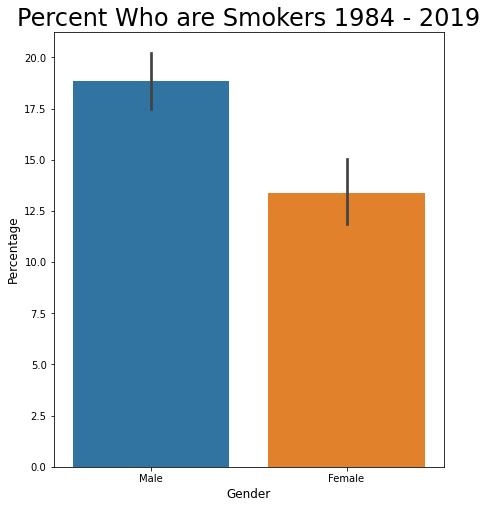

In [ ]:
plt.figure(figsize=(7, 8))
ax = sns.barplot(x='GENDER', y='PERCENT', data=gender_df)
ax.set_title('Percent Who are Smokers 1984 - 2019', size = 24)
ax.set_ylabel("Percentage", size = 12)
ax.set_xlabel("Gender", size = 12)

In [ ]:
stats.ttest_ind(male_df2['PERCENT'], female_df2['PERCENT'])

Ttest_indResult(statistic=8.456794995378859, pvalue=2.8962716694396594e-10)

Text(0.5, 0, 'Gender')

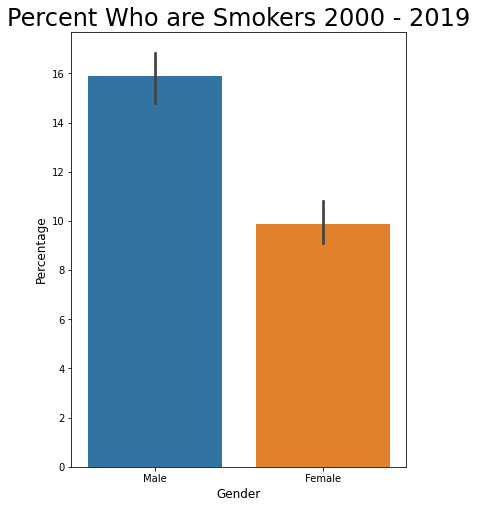

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.barplot(x='GENDER', y='PERCENT', data=gender_df2)
ax.set_title('Percent Who are Smokers 2000 - 2019', size = 24)
ax.set_ylabel("Percentage", size = 12)
ax.set_xlabel("Gender", size = 12)

##Findings of Hypothesis 1
The first T-test of smokers from 1984 - 2019 shows a significant difference betweeen male and female smokers,  with p < . 01. The second T-test of data from  smokers since the year 2000 also has similiar results.  The barplot shows males are signficiantly more likely to be smokers than females. **Supports The Hypothesis**

##Hypothesis 2
There will be no correlation between Population Size and Tobacco Consumption. Tobacco consumption is measured in cigarettes and cigarette euqivalents

Text(0, 0.5, 'Cigarretes Per capita')

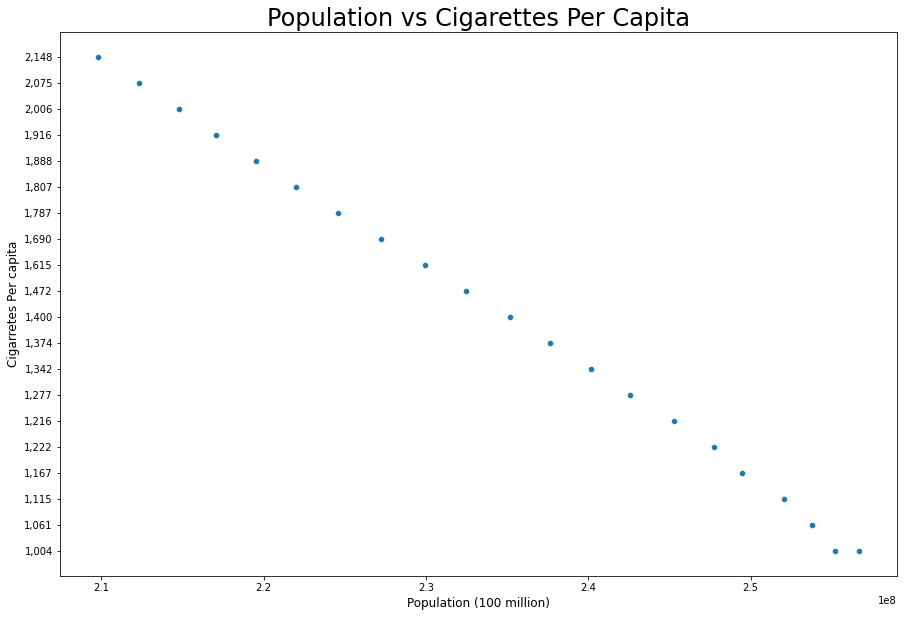

In [ ]:
plt.figure(figsize = (15, 10))
ax= sns.scatterplot(y='Total Per Capita', x='Population', data=capita_df)
ax.set_title("Population vs Cigarettes Per Capita", size = 24)
ax.set_xlabel( "Population (100 million)" , size = 12 )
ax.set_ylabel("Cigarretes Per capita", size = 12)

Text(0, 0.5, 'Total Combustible Tobacco (in 10 billion cigarette equivalents)')

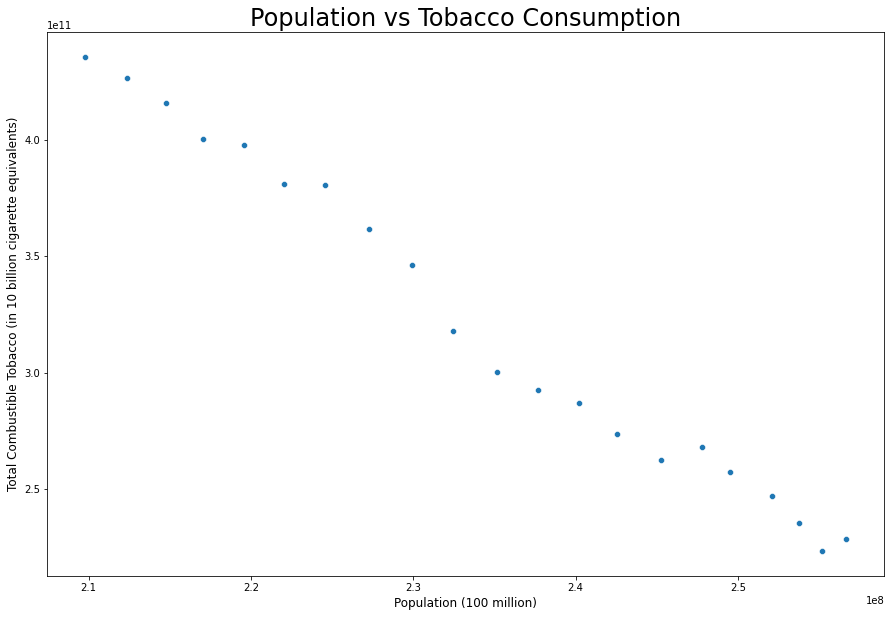

In [ ]:
plt.figure(figsize = (15, 10))
ax= sns.scatterplot(y='Total', x='Population', data=tobacco_df)
ax.set_title("Population vs Tobacco Consumption", size = 24)
ax.set_xlabel( "Population (100 million)" , size = 12 )
ax.set_ylabel("Total Combustible Tobacco (in 10 billion cigarette equivalents)", size = 12)

In [ ]:
stats.pearsonr(tobacco_df['Population'], tobacco_df['Total'])

(-0.9925149362870732, 8.109128187333502e-19)

##Findings from Hypothesis 2
According to our scatter plots, there is a strong negative correlation between population and cigarrete consumption. This is further supported with a Pearson correlation coefficent greater than -0.99. **Rejects The Hypothesis**
